# Loan Default

## Import Libraries

In [189]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_column = None
pd.options.display.max_rows = None

In [190]:
from warnings import filterwarnings
filterwarnings('ignore')

# Data Cleaning

In [191]:
df_train = pd.read_csv('Data_Train.csv')

In [192]:
df_train.head()

ID  Asst_Reg GGGrade Experience       Validation  Yearly Income  \
0   95074    421802      II     >10yrs            Vfied      633600.00   
1  134131   3964312      IV       7yrs  Source Verified       85483.20   
2   92602   4247560     III       <1yr  Source Verified       79200.00   
3   22591    197179     III       <1yr            Vfied       61600.00   
4  125060   4646684       V       2yrs  Source Verified       68053.92   

  Home Status  Unpaid 2 years  Already Defaulted       Designation  \
0    MOR??AGE               0                  0   GLENDALE NISSAN   
1        REN?               0                  0  Business Teacher   
2        REN?               0                  0            driver   
3        REN?               0                  0          AvePoint   
4        REN?               0                  0       Lead Tester   

   Debt to Income  Postal Code  Lend Amount  Deprecatory Records  \
0         12.5496      91300.0     42023.25                    0   
1          9.0048      27400.0     38133.00                    0   
2         24.9144      32800.0     17100.00                    0   
3         16.5816       7000.0      5130.00                    0   
4         40.0512      70800.0     19665.00                    0   

   Interest Charged  Usage Rate  Inquiries  Present Balance  Gross Collection  \
0             15.39      88.924          3        607161.90               0.0   
1              9.94     102.856          0        269234.06               0.0   
2             22.35      60.372          0         22476.53               0.0   
3             10.36     116.272          1         15242.09               0.0   
4             13.68     127.280          1         65433.94               0.0   

   Sub GGGrade File Status       State  Account Open  Total Unpaid CL  \
0           19  fully paid  California            17          58598.0   
1           30       whole          NC            15          18924.0   
2           25       whole     Florida             7          15604.0   
3           22  fully paid   NewJersey             9          22410.0   
4           32  fully paid          LA            10          36022.0   

  Duration  Unpaid Amount               Reason Claim Type  Due Fee  \
0  3 years       31216.05  debt  consolidation          I      0.0   
1  5 years       11660.49  debt  consolidation          I      0.0   
2  5 years        5637.87      major  purchase          I      0.0   
3  3 years       15607.17      major  purchase          I      0.0   
4  5 years       27472.86  debt  consolidation          I      0.0   

   Loan/No Loan  
0             0  
1             0  
2             0  
3             1  
4             0

In [193]:
df_train.shape

(87500, 30)

In [194]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87500 entries, 0 to 87499
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   87500 non-null  int64  
 1   Asst_Reg             87500 non-null  int64  
 2   GGGrade              87500 non-null  object 
 3   Experience           87500 non-null  object 
 4   Validation           87500 non-null  object 
 5   Yearly Income        81925 non-null  float64
 6   Home Status          87500 non-null  object 
 7   Unpaid 2 years       87500 non-null  int64  
 8   Already Defaulted    87500 non-null  int64  
 9   Designation          86086 non-null  object 
 10  Debt to Income       84011 non-null  float64
 11  Postal Code          86111 non-null  float64
 12  Lend Amount          87500 non-null  float64
 13  Deprecatory Records  87500 non-null  int64  
 14  Interest Charged     87500 non-null  float64
 15  Usage Rate           87500 non-null 

In [195]:
df_train.isnull().sum()

ID                        0
Asst_Reg                  0
GGGrade                   0
Experience                0
Validation                0
Yearly Income          5575
Home Status               0
Unpaid 2 years            0
Already Defaulted         0
Designation            1414
Debt to Income         3489
Postal Code            1389
Lend Amount               0
Deprecatory Records       0
Interest Charged          0
Usage Rate                0
Inquiries                 0
Present Balance           0
Gross Collection          0
Sub GGGrade               0
File Status               0
State                     0
Account Open              0
Total Unpaid CL        4186
Duration                  0
Unpaid Amount          4852
Reason                    0
Claim Type                0
Due Fee                   0
Loan/No Loan              0
dtype: int64

Treating Anomalies in Data

In [196]:
## Anomalies

## Experience
df_train['Experience'].replace('>10yrs','>=10yrs',inplace=True)

## Validation
df_train['Validation'].replace(['Vfied','Not Vfied'],['Verified','Not Verified'],inplace=True)

## Home Status
df_train['Home Status'].replace(['MOR??AGE','REN?','NONE'],['MORTGAGE','RENT','OTHER'],inplace=True)

## Reason
df_train['Reason'].replace(['debt  consolidation','credit  card','home  improvement','major  purchase','small  business','renewable  energy'],['debt consolidation','credit card','home improvement','major purchase','small business','renewable energy'],inplace=True)

## Claim Type
df_train['Claim Type'].replace(['I','J'],['Individual','Joint'],inplace=True)

## State
df_train['State'].replace(['California','Newyork','Florida','NewJersey','Ohio','Maryland'],['CA','NY','FL','NJ','OH','MD'],inplace=True)

In [197]:
## ID
df_train.drop('ID',axis=1,inplace=True)

In [198]:
df_train['Experience']=df_train['Experience'].str.replace('[<,>]','')

Outliers & it's Treatment

<AxesSubplot:xlabel='Asst_Reg'>

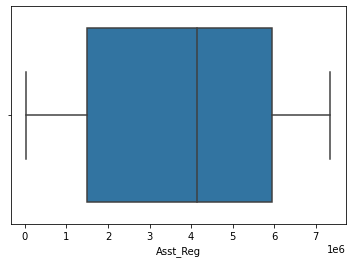

In [199]:
## Asst_Reg
sns.boxplot(df_train['Asst_Reg'])

In [200]:
## Yearly Income

In [201]:
df_train['Yearly Income'] = np.where(df_train['Yearly Income'] > 1773705, 1773705, df_train['Yearly Income'])

<AxesSubplot:xlabel='Yearly Income', ylabel='Density'>

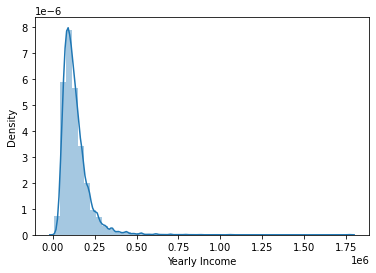

In [202]:
sns.distplot(df_train['Yearly Income'])

In [203]:
## Unpaid 2 Year

In [204]:
df_train['Unpaid 2 years'] = np.where(df_train['Unpaid 2 years'] > 2, 2, df_train['Unpaid 2 years'])

In [205]:
## Already Defaulted

In [206]:
df_train['Already Defaulted'] = np.where(df_train['Already Defaulted'] > 1, 1, df_train['Already Defaulted'])

In [207]:
## Debt to Income 

<AxesSubplot:xlabel='Debt to Income'>

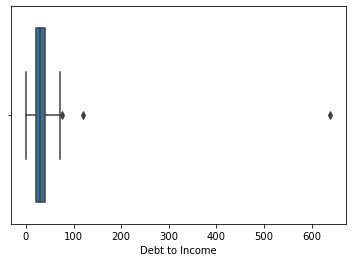

In [208]:
sns.boxplot(df_train['Debt to Income'])

In [209]:
IQR = df_train['Debt to Income'].quantile(0.75) - df_train['Debt to Income'].quantile(0.25)
UL = df_train['Debt to Income'].quantile(0.75) + 1.5*(IQR)

In [210]:
df_train['Debt to Income'] = np.where(df_train['Debt to Income'] > UL, UL, df_train['Debt to Income'])

In [211]:
## Lend Amount

<AxesSubplot:xlabel='Lend Amount'>

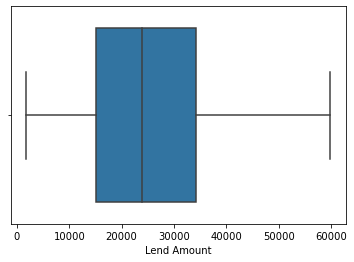

In [212]:
sns.boxplot(df_train['Lend Amount'])

In [213]:
## Deprecatory Records

In [214]:
df_train['Deprecatory Records'] = np.where(df_train['Deprecatory Records'] > 2, 2, df_train['Deprecatory Records'])

In [215]:
## Interest Charged

<AxesSubplot:xlabel='Interest Charged'>

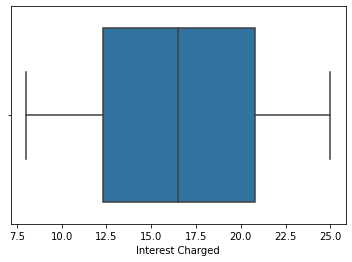

In [216]:
sns.boxplot(df_train['Interest Charged'])

In [217]:
## Usage Rate

In [218]:
IQR = df_train['Usage Rate'].quantile(0.75) - df_train['Usage Rate'].quantile(0.25)
UL = df_train['Usage Rate'].quantile(0.75) + 1.5*(IQR)

df_train['Usage Rate'] = np.where(df_train['Usage Rate'] > UL, UL, df_train['Usage Rate'])

In [219]:
## Inquiries

In [220]:
df_train['Inquiries'] = np.where(df_train['Inquiries'] > 3, 3, df_train['Inquiries'])

In [221]:
## Present Balance

<AxesSubplot:xlabel='Present Balance'>

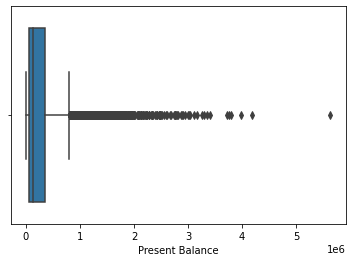

In [222]:
sns.boxplot(df_train['Present Balance'])

In [223]:
df_train['Present Balance'] = np.where(df_train['Present Balance'] > 3028329, 3028329, df_train['Present Balance'])

In [224]:
df_train['Present Balance'].describe()

count    8.750000e+04
mean     2.362947e+05
std      2.537702e+05
min      0.000000e+00
25%      5.173493e+04
50%      1.388062e+05
75%      3.534755e+05
max      3.028329e+06
Name: Present Balance, dtype: float64

<AxesSubplot:xlabel='Gross Collection'>

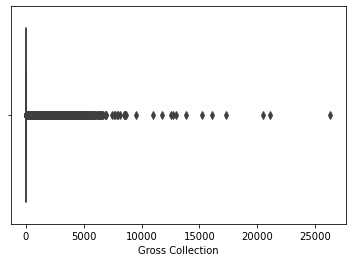

In [225]:
## Gross Collection
sns.boxplot(df_train['Gross Collection'])

In [227]:
df_train['Gross Collection'].describe()

count    87500.000000
mean        39.461697
std        391.919578
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      26308.470000
Name: Gross Collection, dtype: float64

In [230]:
df_train['Gross Collection'].quantile([0.99,0.999,0.9999,0.99999])

0.99000     1500.046600
0.99900     5091.852800
0.99990    12549.775627
0.99999    21747.873372
Name: Gross Collection, dtype: float64

In [231]:
df_train['Gross Collection'] = np.where(df_train['Gross Collection'] > 12549, 12549, df_train['Gross Collection'])

<AxesSubplot:xlabel='Due Fee'>

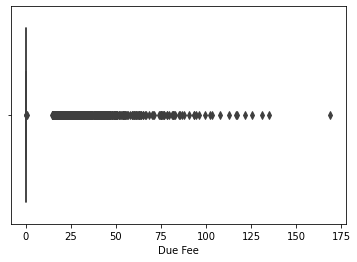

In [232]:
## Due Fee
sns.boxplot(df_train['Due Fee'])

In [233]:
df_train['Due Fee'].describe()

count    87500.000000
mean         0.316407
std          3.546087
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        169.050000
Name: Due Fee, dtype: float64

In [234]:
df_train['Due Fee'].quantile([0.99,0.999,0.9999,0.99999])

0.99000     15.000000
0.99900     49.835070
0.99990    104.535438
0.99999    139.064093
Name: Due Fee, dtype: float64

In [235]:
df_train['Due Fee'] = np.where(df_train['Due Fee'] > 139, 139, df_train['Due Fee'])

In [37]:
## Account Open

<AxesSubplot:xlabel='Account Open'>

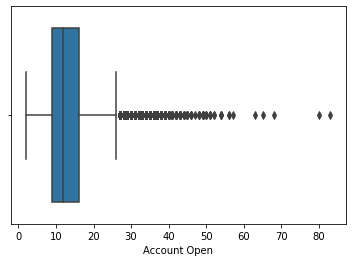

In [236]:
sns.boxplot(df_train['Account Open'])

In [237]:
df_train['Account Open'] = np.where(df_train['Account Open'] > 52, 52, df_train['Account Open'])

In [238]:
df_train['Account Open'].describe()

count    87500.000000
mean        12.778091
std          5.358788
min          2.000000
25%          9.000000
50%         12.000000
75%         16.000000
max         52.000000
Name: Account Open, dtype: float64

In [41]:
## Total Un-Paid CL

<AxesSubplot:xlabel='Total Unpaid CL'>

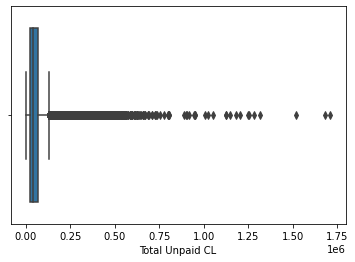

In [239]:
sns.boxplot(df_train['Total Unpaid CL'])

In [240]:
df_train['Total Unpaid CL'] = np.where(df_train['Total Unpaid CL'] > 806194, 806194, df_train['Total Unpaid CL'])

In [44]:
## Unpaid Amount

<AxesSubplot:xlabel='Unpaid Amount'>

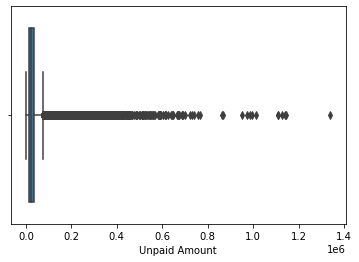

In [241]:
sns.boxplot(df_train['Unpaid Amount'])

In [242]:
df_train['Unpaid Amount'] = np.where(df_train['Unpaid Amount'] > 764845, 764845, df_train['Unpaid Amount'])

Null Values Treatment

In [243]:
## Nan Values Replacement
df_train['Yearly Income'] = df_train['Yearly Income'].fillna(df_train['Yearly Income'].median())
df_train['Debt to Income'] = df_train['Debt to Income'].fillna(df_train['Debt to Income'].median())
df_train['Total Unpaid CL'] = df_train['Total Unpaid CL'].fillna(df_train['Total Unpaid CL'].median())
df_train['Unpaid Amount'] = df_train['Unpaid Amount'].fillna(df_train['Unpaid Amount'].median())

In [244]:
## Dropping
df_train.drop(['Designation','Postal Code'],axis=1,inplace=True)

In [245]:
## Change DataTypes
df_train['Unpaid 2 years'] = df_train['Unpaid 2 years'].astype('object')
df_train['Already Defaulted'] = df_train['Already Defaulted'].astype('object')
df_train['Deprecatory Records'] = df_train['Deprecatory Records'].astype('object')
df_train['Inquiries'] = df_train['Inquiries'].astype('object')

In [246]:
## aranging numerical columns
dftr_num=df_train.drop('Loan/No Loan',axis=1).select_dtypes('number')
dftr_num.columns

Index(['Asst_Reg', 'Yearly Income', 'Debt to Income', 'Lend Amount',
       'Interest Charged', 'Usage Rate', 'Present Balance', 'Gross Collection',
       'Sub GGGrade', 'Account Open', 'Total Unpaid CL', 'Unpaid Amount',
       'Due Fee'],
      dtype='object')

In [247]:
## Aranging Categorical columns
dftr_cat=df_train.select_dtypes('object')
dftr_cat.columns

Index(['GGGrade', 'Experience', 'Validation', 'Home Status', 'Unpaid 2 years',
       'Already Defaulted', 'Deprecatory Records', 'Inquiries', 'File Status',
       'State', 'Duration', 'Reason', 'Claim Type'],
      dtype='object')

# Exploratory Data Analysis

## Univariate Analysis

Asst_Reg


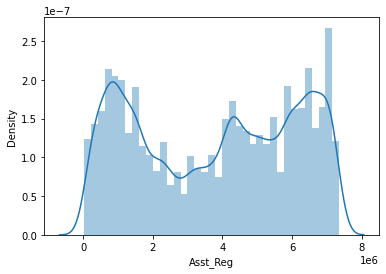

Yearly Income


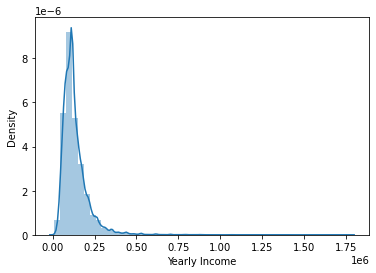

Debt to Income


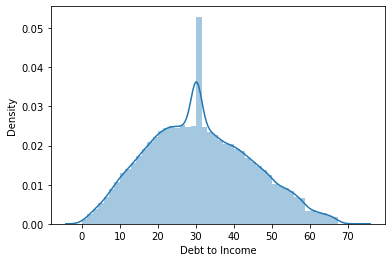

Lend Amount


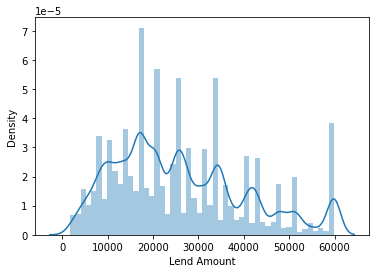

Interest Charged


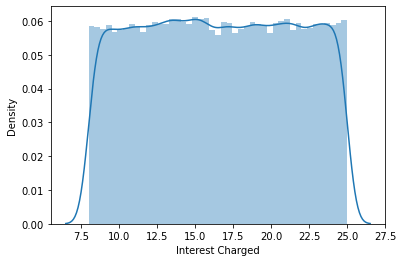

Usage Rate


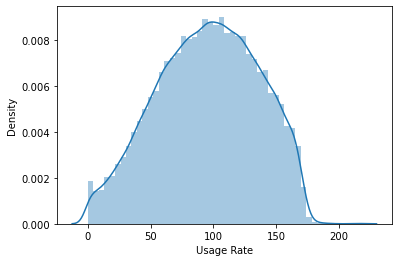

Present Balance


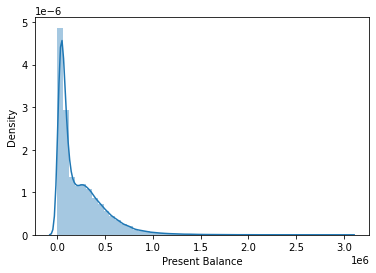

Gross Collection


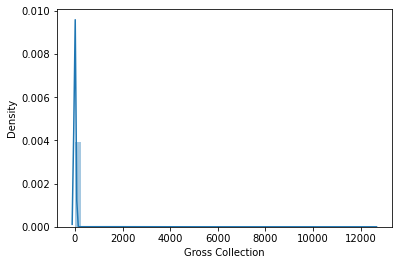

Sub GGGrade


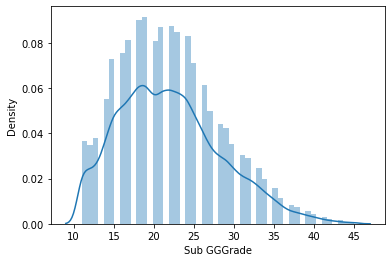

Account Open


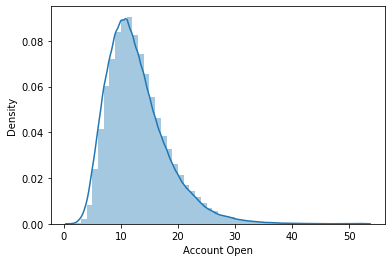

Total Unpaid CL


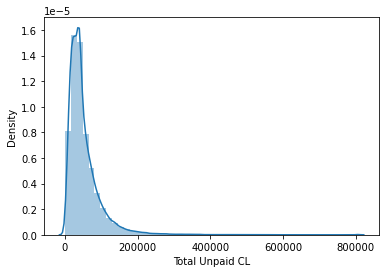

Unpaid Amount


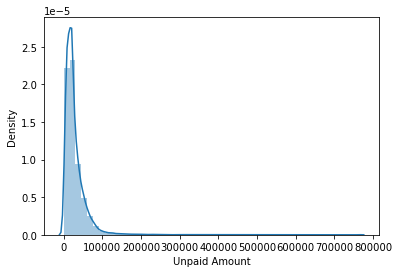

Due Fee


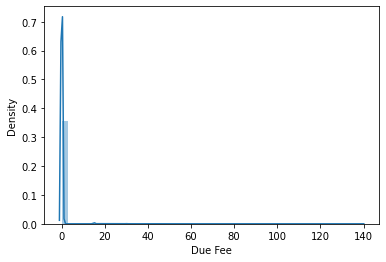

In [373]:
for i in dftr_num.columns:
    print(i)
    sns.distplot(dftr_num[i])
    plt.show()

GGGrade


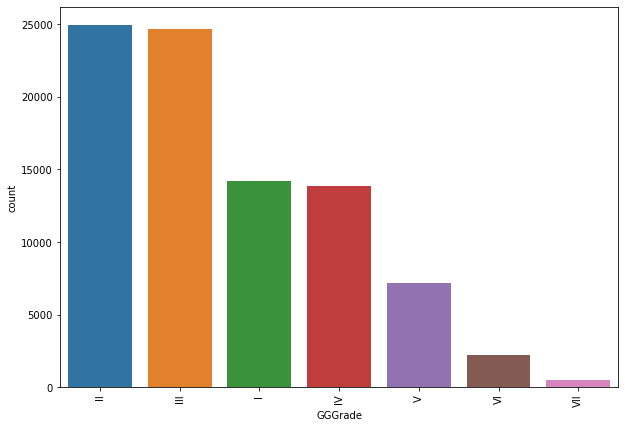

Experience


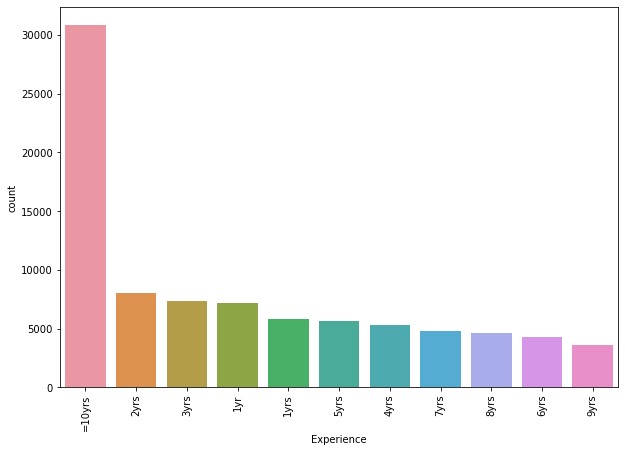

Validation


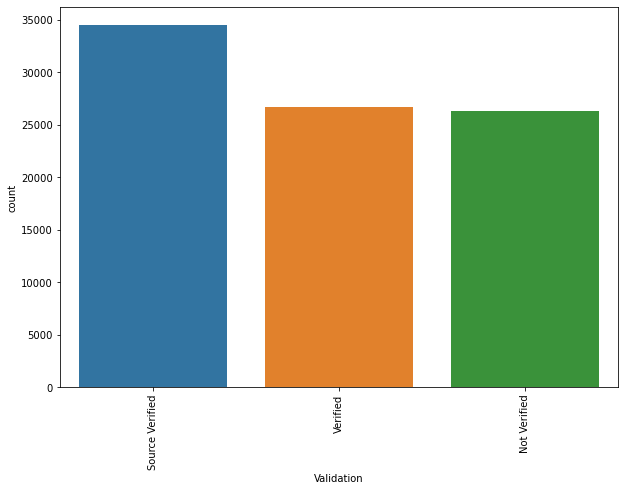

Home Status


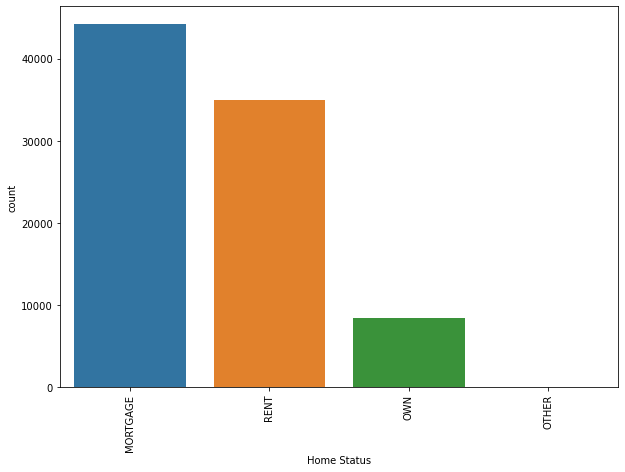

Unpaid 2 years


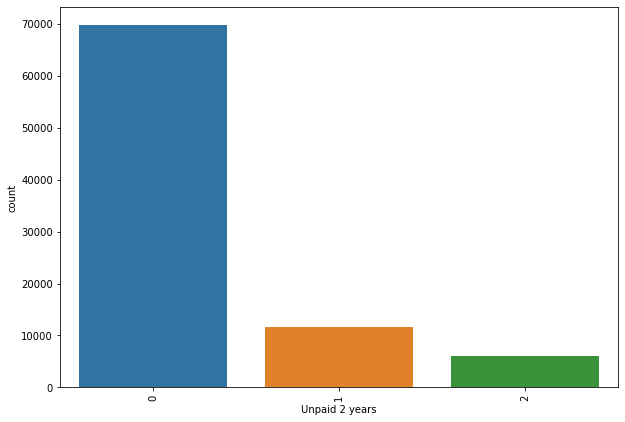

Already Defaulted


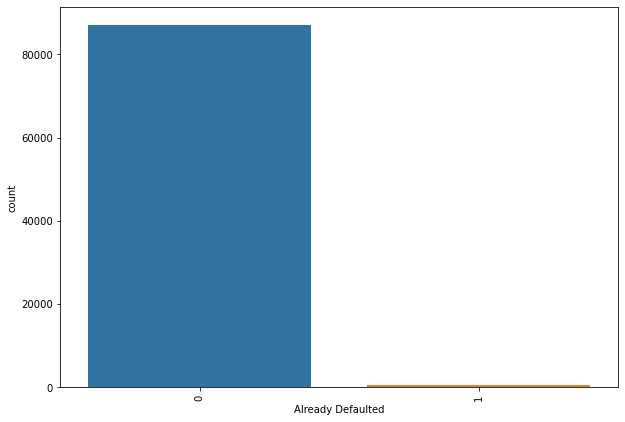

Deprecatory Records


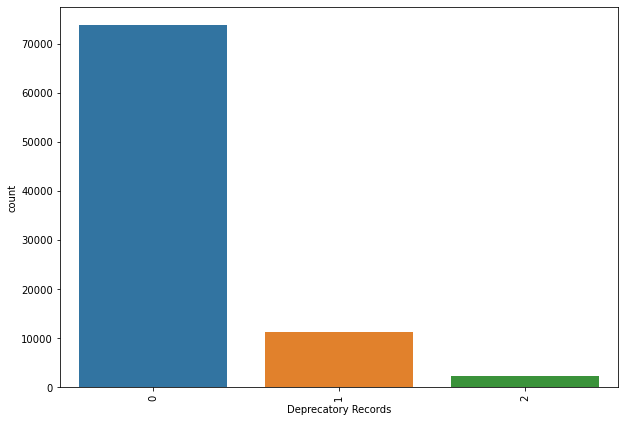

Inquiries


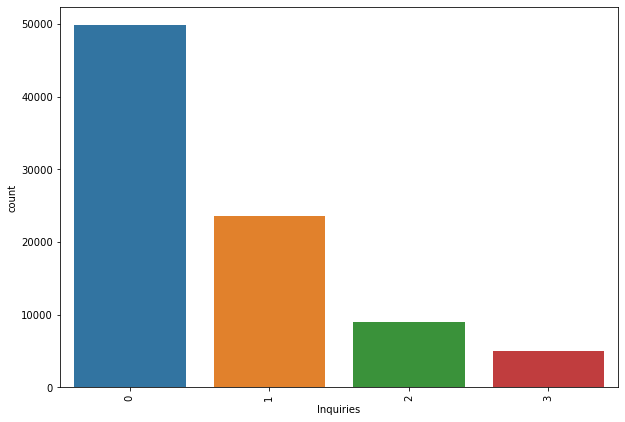

File Status


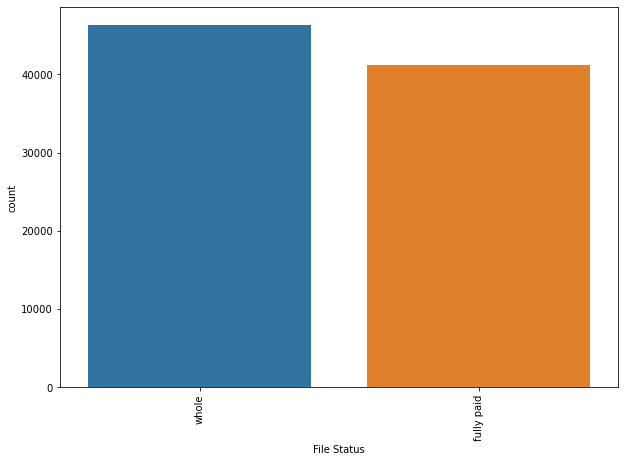

State


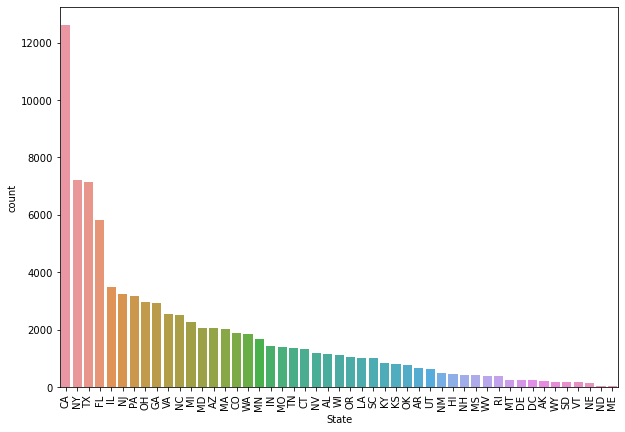

Duration


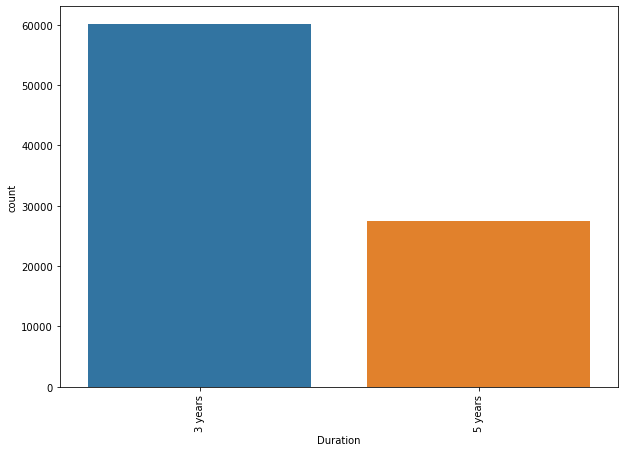

Reason


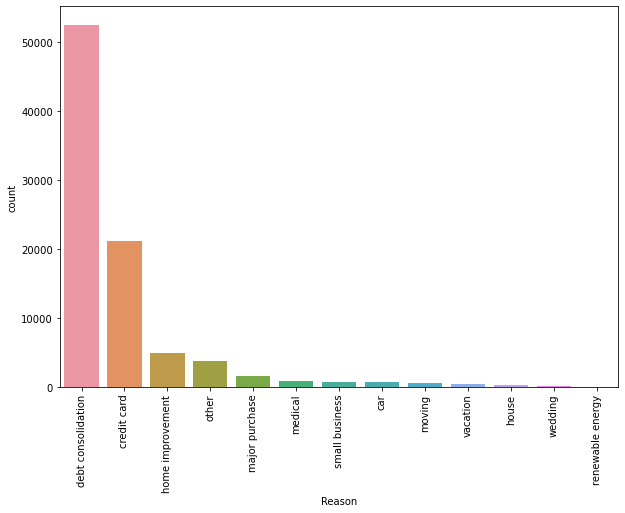

Claim Type


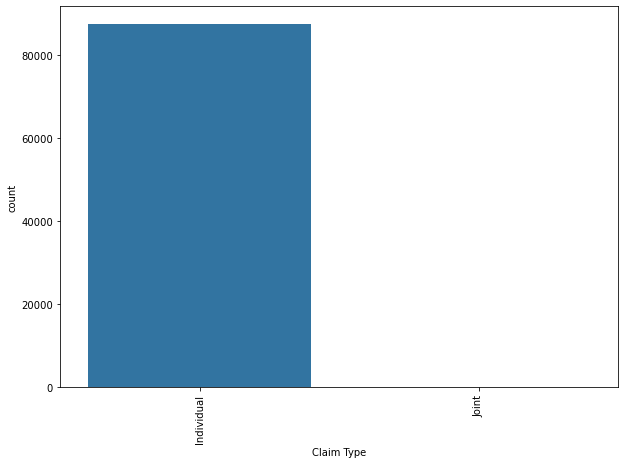

In [374]:
for j in dftr_cat.columns:
    print(j)
    plt.figure(figsize=(10,7))
    sns.countplot(dftr_cat[j],order=dftr_cat[j].value_counts().index)
    plt.xticks(rotation=90)
    plt.show()

# BiVariate Analysis

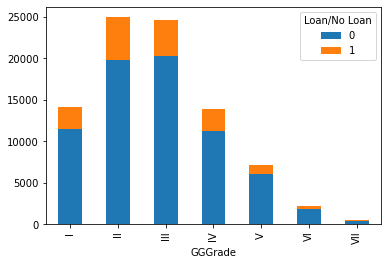

In [375]:
grade_def=pd.crosstab(dftr_cat['GGGrade'],df_train['Loan/No Loan'])
grade_def.plot(kind='bar',stacked=True)
plt.show()

Grade II & Grade III are more likely to default.

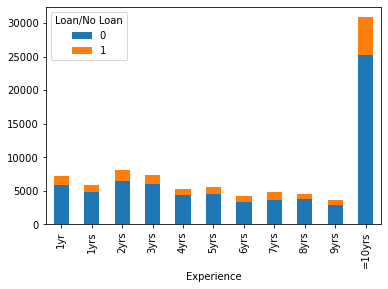

In [377]:
pd.crosstab(dftr_cat['Experience'],df_train['Loan/No Loan']).plot(kind='bar',stacked=True)
plt.show()

Customers with 10 years of experience are more likely to default

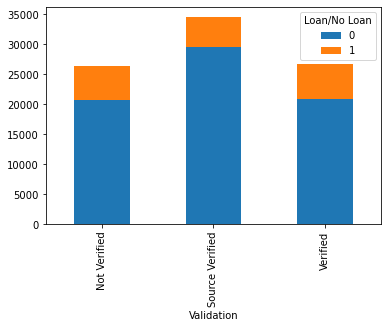

In [378]:
pd.crosstab(dftr_cat['Validation'],df_train['Loan/No Loan']).plot(kind='bar',stacked=True)
plt.show()

Customers who are verified are more likely to default

In [ ]:
pd.crosstab(dftr_cat['Home Status'],df_train['Loan/No Loan']).plot(kind='bar',stacked=True)
plt.show()

Customers who have a mortgage home are more likey to default when compared to customneres who stay in rented and own houses

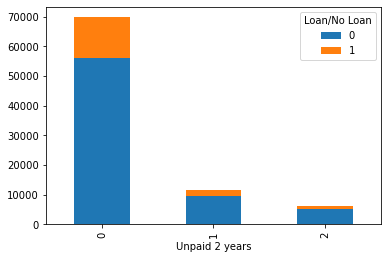

In [379]:
pd.crosstab(dftr_cat['Unpaid 2 years'],df_train['Loan/No Loan']).plot(kind='bar',stacked=True)
plt.show()

More no of customers have defaulted once in the last two years

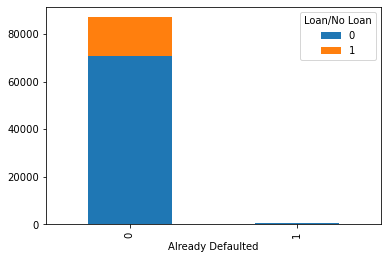

In [380]:
pd.crosstab(dftr_cat['Already Defaulted'],df_train['Loan/No Loan']).plot(kind='bar',stacked=True)
plt.show()

Very few Customers already defaulted a loan before

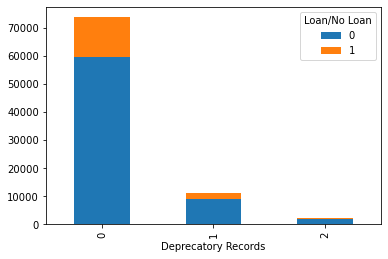

In [381]:
pd.crosstab(dftr_cat['Deprecatory Records'],df_train['Loan/No Loan']).plot(kind='bar',stacked=True)
plt.show()

Customers having Deprecatory Records of 1 are more likely to default.

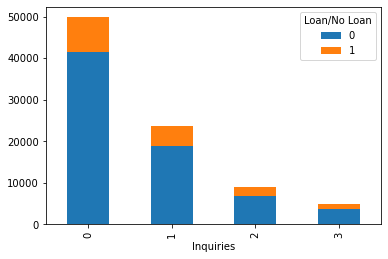

In [382]:
pd.crosstab(dftr_cat['Inquiries'],df_train['Loan/No Loan']).plot(kind='bar',stacked=True)
plt.show()

Customers who have made inquiries are more likely to default.

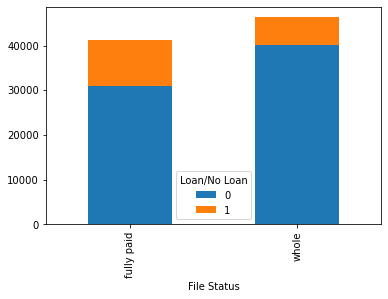

In [383]:
pd.crosstab(dftr_cat['File Status'],df_train['Loan/No Loan']).plot(kind='bar',stacked=True)
plt.show()

Customers whose loan status is fully paid are more likely to default.

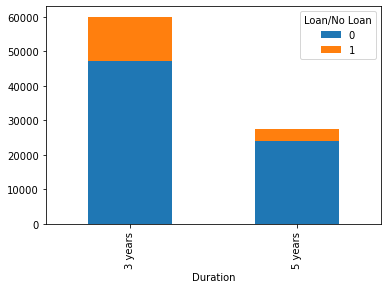

In [384]:
pd.crosstab(dftr_cat['Duration'],df_train['Loan/No Loan']).plot(kind='bar',stacked=True)
plt.show()

Customers whose loan duaration is of 3 years are more likely to default when compared to 5 year duartion.

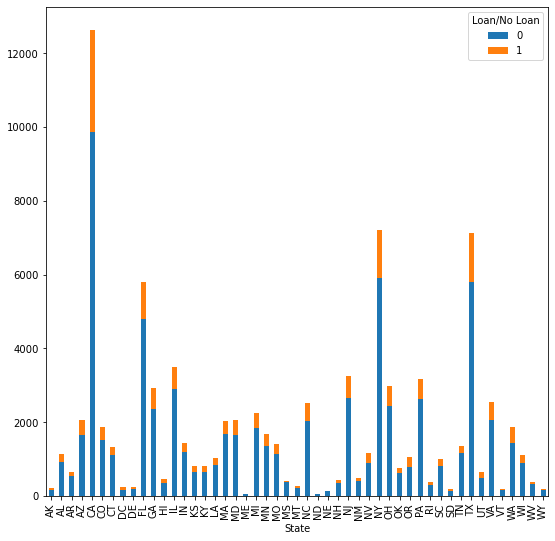

In [385]:
pd.crosstab(dftr_cat['State'],df_train['Loan/No Loan']).plot(kind='bar',stacked=True,figsize=(9,9))
plt.xticks(rotation=90)
plt.show()

Customers belonging to states CA,NY,TX,FL are more likely to default when compared to other states

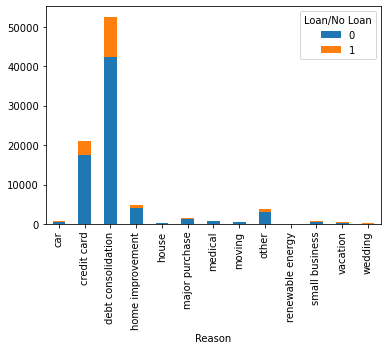

In [386]:
pd.crosstab(dftr_cat['Reason'],df_train['Loan/No Loan']).plot(kind='bar',stacked=True)
plt.show()

Customers who have purchased a loan for reason such as debt consolidation,credit card are more likely to default.

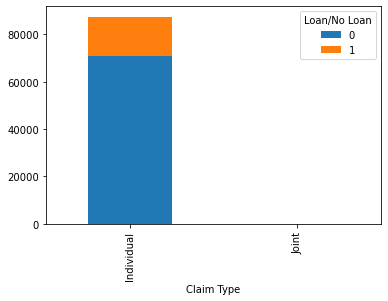

In [387]:
pd.crosstab(dftr_cat['Claim Type'],df_train['Loan/No Loan']).plot(kind='bar',stacked=True)
plt.show()

Individual Customers are more likely to default than joint Customers

# MultiVariate Analysis

<Figure size 720x720 with 0 Axes>

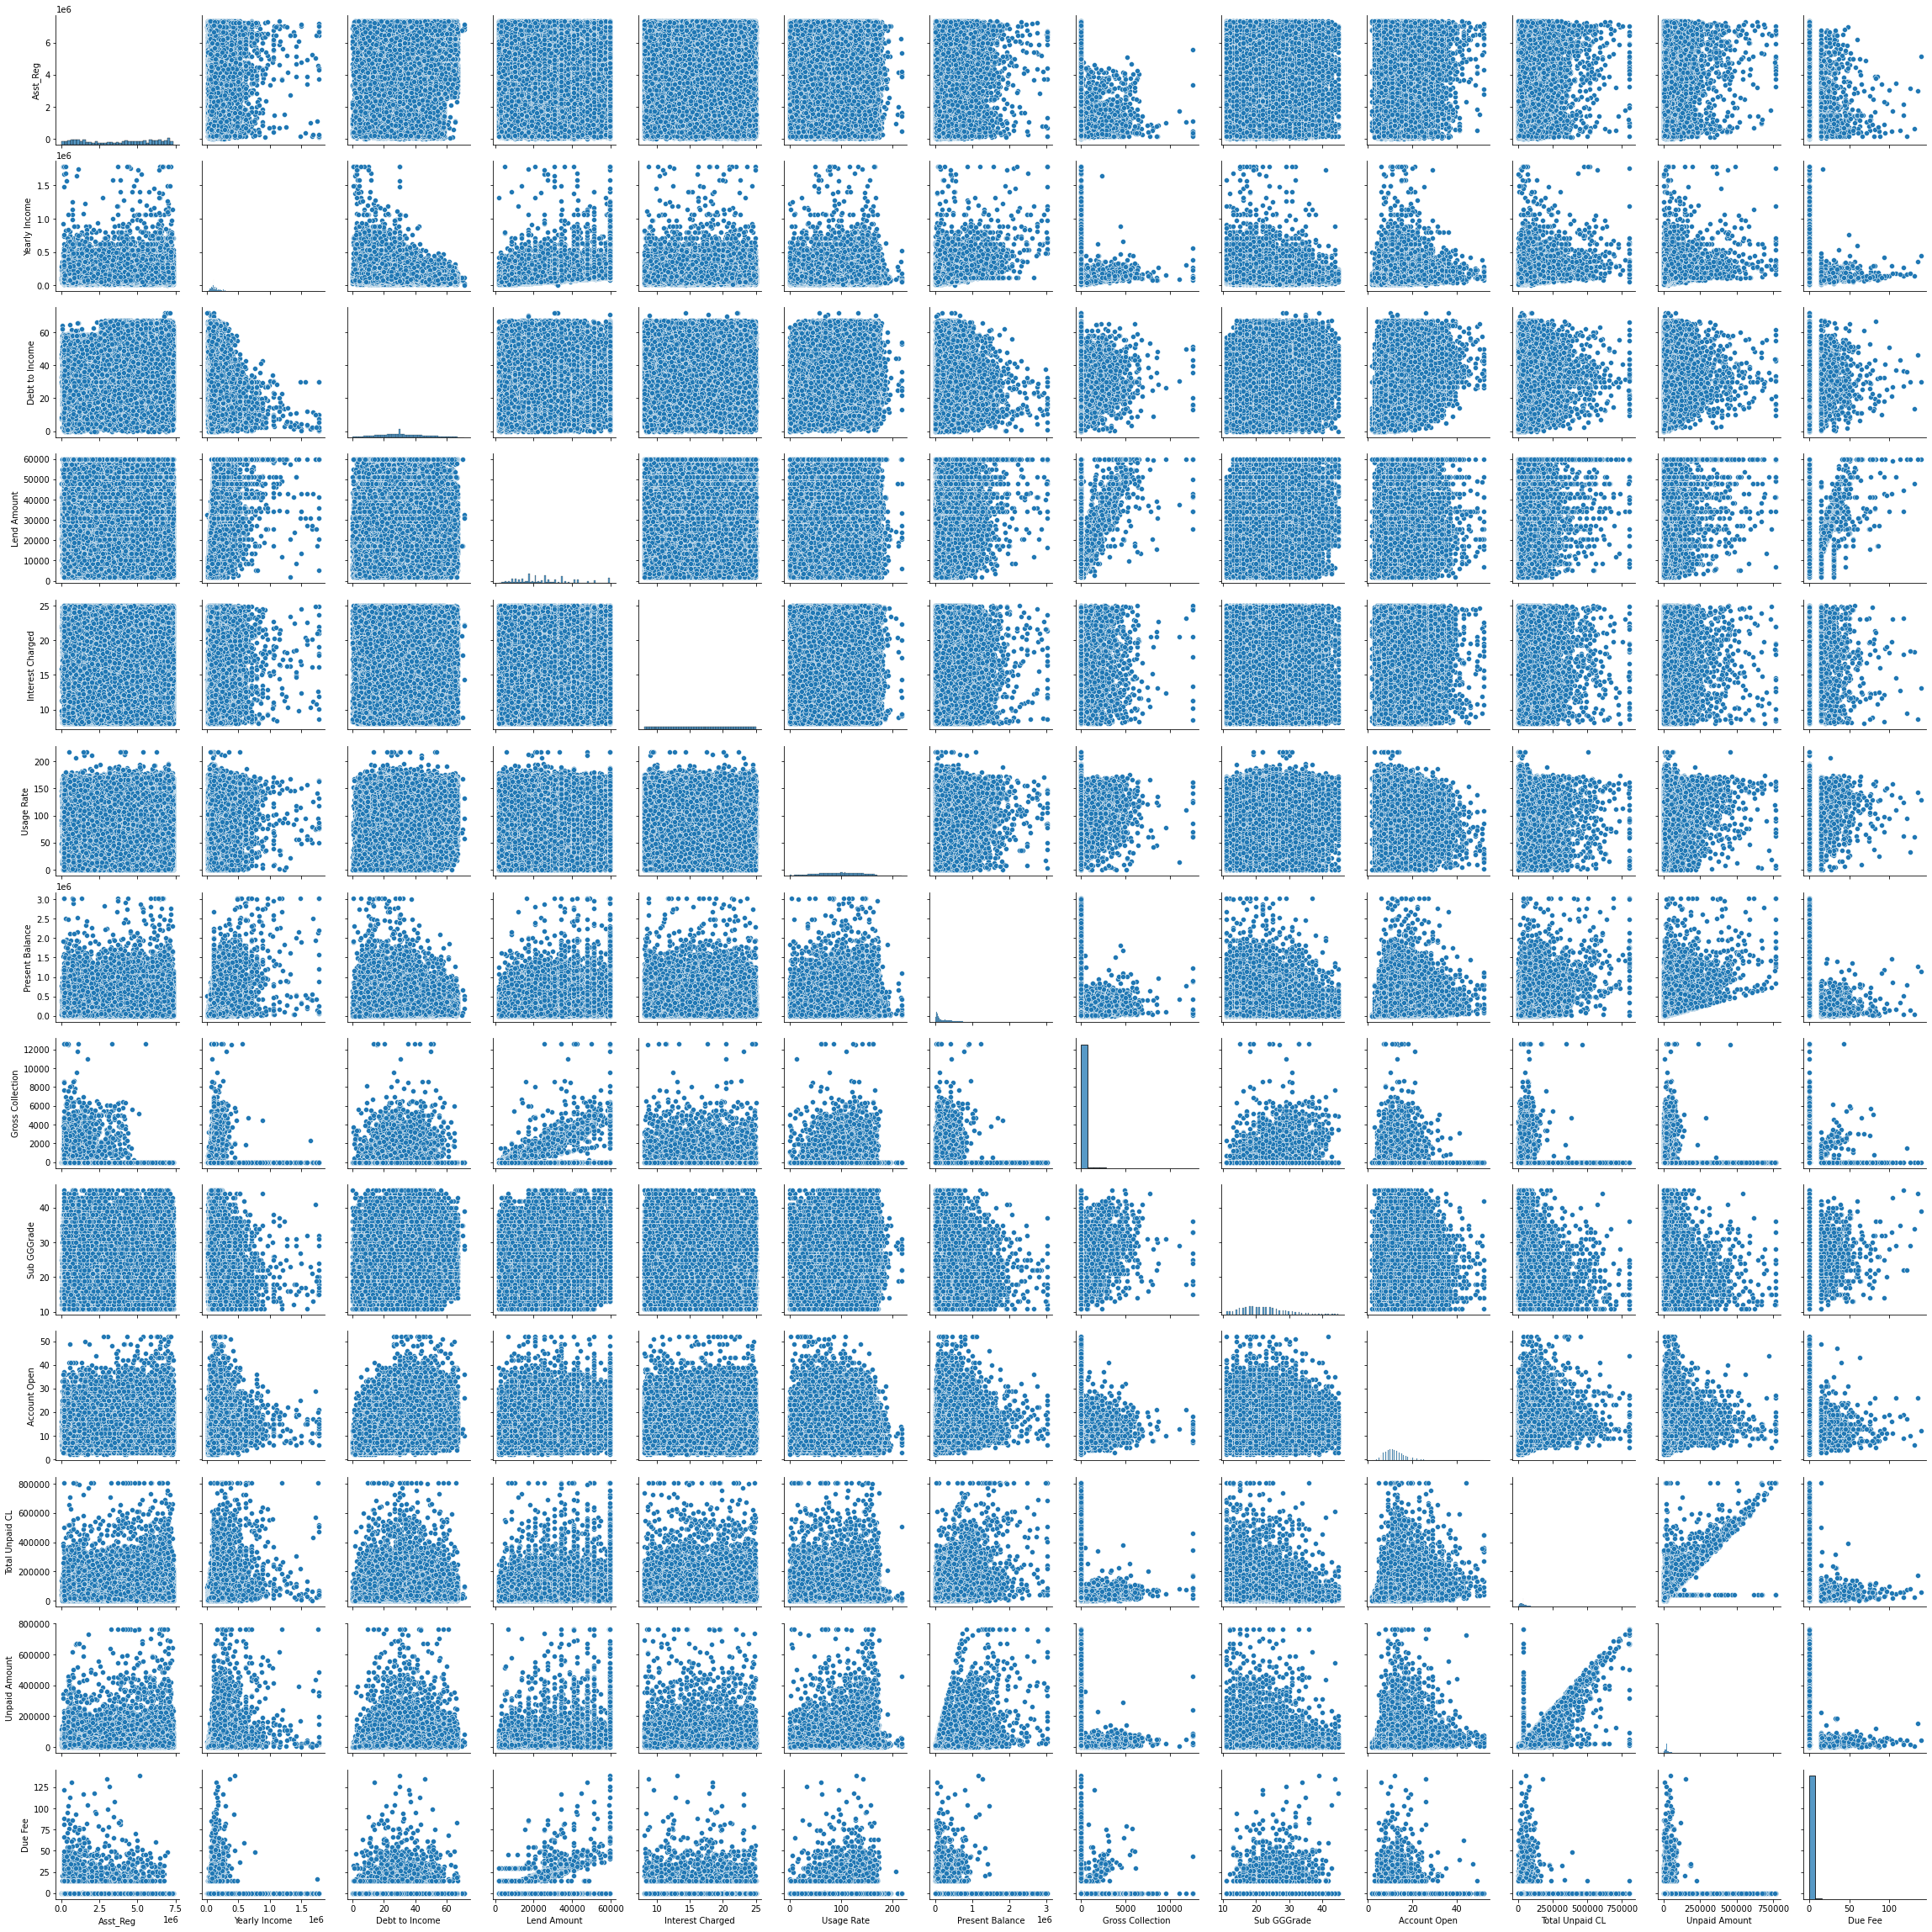

In [405]:
plt.figure(figsize=(10,10))
sns.pairplot(dftr_num)

<AxesSubplot:xlabel='Yearly Income', ylabel='Lend Amount'>

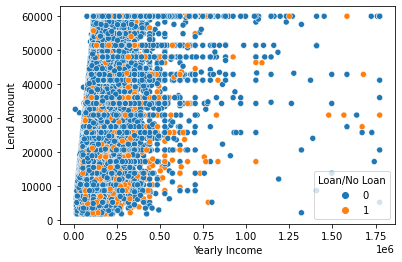

In [406]:
sns.scatterplot(x='Yearly Income',y='Lend Amount',data=dftr_num,hue=df_train['Loan/No Loan'])

Customers who have yearly income less than 0.75 and higher lending amount are likely to default

<AxesSubplot:xlabel='Asst_Reg', ylabel='Yearly Income'>

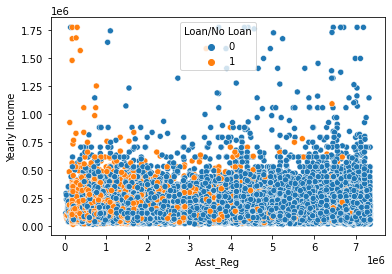

In [407]:
sns.scatterplot(x='Asst_Reg',y='Yearly Income',data=dftr_num,hue=df_train['Loan/No Loan'])

Customers who have less asset registration and less yearly income are more likely to default.

# Feature Engineering - Train Data

## Scaling the Data

In [249]:
from sklearn.preprocessing import StandardScaler
x=StandardScaler()
df_nums=x.fit_transform(dftr_num)
df_scaled=pd.DataFrame(df_nums,columns=dftr_num.columns)
df_scaled.head(2)

Asst_Reg  Yearly Income  Debt to Income  Lend Amount  Interest Charged  \
0 -1.475350       5.873706       -1.345521     1.115629         -0.230187   
1  0.072257      -0.561219       -1.605389     0.846104         -1.341982   

   Usage Rate  Present Balance  Gross Collection  Sub GGGrade  Account Open  \
0   -0.163364         1.461438         -0.105258    -0.468782      0.787852   
1    0.182731         0.129801         -0.105258     1.235941      0.414631   

   Total Unpaid CL  Unpaid Amount   Due Fee  
0         0.120517       0.061634 -0.089507  
1        -0.667631      -0.490769 -0.089507

## Encoding the Data

In [250]:
df_encode=pd.get_dummies(dftr_cat,drop_first=True)
df_encode.head(1)

GGGrade_II  GGGrade_III  GGGrade_IV  GGGrade_V  GGGrade_VI  GGGrade_VII  \
0           1            0           0          0           0            0   

   Experience_1yrs  Experience_2yrs  Experience_3yrs  Experience_4yrs  \
0                0                0                0                0   

   Experience_5yrs  Experience_6yrs  Experience_7yrs  Experience_8yrs  \
0                0                0                0                0   

   Experience_9yrs  Experience_=10yrs  Validation_Source Verified  \
0                0                  1                           0   

   Validation_Verified  Home Status_OTHER  Home Status_OWN  Home Status_RENT  \
0                    1                  0                0                 0   

   Unpaid 2 years_1  Unpaid 2 years_2  Already Defaulted_1  \
0                 0                 0                    0   

   Deprecatory Records_1  Deprecatory Records_2  Inquiries_1  Inquiries_2  \
0                      0                      0            0            0   

   Inquiries_3  File Status_whole  State_AL  State_AR  State_AZ  State_CA  \
0            1                  0         0         0         0         1   

   State_CO  State_CT  State_DC  State_DE  State_FL  State_GA  State_HI  \
0         0         0         0         0         0         0         0   

   State_IL  State_IN  State_KS  State_KY  State_LA  State_MA  State_MD  \
0         0         0         0         0         0         0         0   

   State_ME  State_MI  State_MN  State_MO  State_MS  State_MT  State_NC  \
0         0         0         0         0         0         0         0   

   State_ND  State_NE  State_NH  State_NJ  State_NM  State_NV  State_NY  \
0         0         0         0         0         0         0         0   

   State_OH  State_OK  State_OR  State_PA  State_RI  State_SC  State_SD  \
0         0         0         0         0         0         0         0   

   State_TN  State_TX  State_UT  State_VA  State_VT  State_WA  State_WI  \
0         0         0         0         0         0         0         0   

   State_WV  State_WY  Duration_5 years  Reason_credit card  \
0         0         0                 0                   0   

   Reason_debt consolidation  Reason_home improvement  Reason_house  \
0                          1                        0             0   

   Reason_major purchase  Reason_medical  Reason_moving  Reason_other  \
0                      0               0              0             0   

   Reason_renewable energy  Reason_small business  Reason_vacation  \
0                        0                      0                0   

   Reason_wedding  Claim Type_Joint  
0               0                 0

In [251]:
train_new=pd.concat([df_scaled,df_encode],axis=1)
train_new.head(1)

Asst_Reg  Yearly Income  Debt to Income  Lend Amount  Interest Charged  \
0  -1.47535       5.873706       -1.345521     1.115629         -0.230187   

   Usage Rate  Present Balance  Gross Collection  Sub GGGrade  Account Open  \
0   -0.163364         1.461438         -0.105258    -0.468782      0.787852   

   Total Unpaid CL  Unpaid Amount   Due Fee  GGGrade_II  GGGrade_III  \
0         0.120517       0.061634 -0.089507           1            0   

   GGGrade_IV  GGGrade_V  GGGrade_VI  GGGrade_VII  Experience_1yrs  \
0           0          0           0            0                0   

   Experience_2yrs  Experience_3yrs  Experience_4yrs  Experience_5yrs  \
0                0                0                0                0   

   Experience_6yrs  Experience_7yrs  Experience_8yrs  Experience_9yrs  \
0                0                0                0                0   

   Experience_=10yrs  Validation_Source Verified  Validation_Verified  \
0                  1                           0                    1   

   Home Status_OTHER  Home Status_OWN  Home Status_RENT  Unpaid 2 years_1  \
0                  0                0                 0                 0   

   Unpaid 2 years_2  Already Defaulted_1  Deprecatory Records_1  \
0                 0                    0                      0   

   Deprecatory Records_2  Inquiries_1  Inquiries_2  Inquiries_3  \
0                      0            0            0            1   

   File Status_whole  State_AL  State_AR  State_AZ  State_CA  State_CO  \
0                  0         0         0         0         1         0   

   State_CT  State_DC  State_DE  State_FL  State_GA  State_HI  State_IL  \
0         0         0         0         0         0         0         0   

   State_IN  State_KS  State_KY  State_LA  State_MA  State_MD  State_ME  \
0         0         0         0         0         0         0         0   

   State_MI  State_MN  State_MO  State_MS  State_MT  State_NC  State_ND  \
0         0         0         0         0         0         0         0   

   State_NE  State_NH  State_NJ  State_NM  State_NV  State_NY  State_OH  \
0         0         0         0         0         0         0         0   

   State_OK  State_OR  State_PA  State_RI  State_SC  State_SD  State_TN  \
0         0         0         0         0         0         0         0   

   State_TX  State_UT  State_VA  State_VT  State_WA  State_WI  State_WV  \
0         0         0         0         0         0         0         0   

   State_WY  Duration_5 years  Reason_credit card  Reason_debt consolidation  \
0         0                 0                   0                          1   

   Reason_home improvement  Reason_house  Reason_major purchase  \
0                        0             0                      0   

   Reason_medical  Reason_moving  Reason_other  Reason_renewable energy  \
0               0              0             0                        0   

   Reason_small business  Reason_vacation  Reason_wedding  Claim Type_Joint  
0                      0                0               0                 0

In [252]:
xtrain=train_new
ytrain=df_train['Loan/No Loan']

In [253]:
xtrain.shape

(87500, 105)

In [111]:
ytrain.shape

(87500,)

## Under Samppling

In [256]:
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy='majority')
xtrain1u,ytrain1u=undersample.fit_resample(xtrain,ytrain)

In [257]:
ytrain1u.value_counts()

0    16512
1    16512
Name: Loan/No Loan, dtype: int64

In [258]:
ytrain1u.shape

(33024,)

## Smote Analysis

In [254]:
from imblearn.over_sampling import SMOTE
oversample=SMOTE()
xtrain1,ytrain1=oversample.fit_resample(xtrain,ytrain)

In [255]:
ytrain1.value_counts()

0    70988
1    70988
Name: Loan/No Loan, dtype: int64

In [259]:
ytrain1.shape

(141976,)

## Test Data

In [260]:
df_test=pd.read_csv('Data_Test.csv')
df_test.head()

ID  Asst_Reg GGGrade Experience       Validation  Yearly Income  \
0  198980   1773284      II       2yrs  Source Verified      140800.00   
1  167688   5298273      II     >10yrs            Vfied      146080.00   
2  198768    189781      VI     >10yrs            Vfied      202222.24   
3  192564   1530906      II     >10yrs            Vfied      105600.00   
4  151199   4410316     III       4yrs        Not Vfied      151360.00   

  Home Status  Unpaid 2 years  Already Defaulted                  Designation  \
0         OWN               0                  0                    processor   
1    MOR??AGE               0                  0  Speech Language Pathologist   
2    MOR??AGE               0                  0                     Raytheon   
3    MOR??AGE               1                  0  Computer/Network Technician   
4    MOR??AGE               0                  0                     NDE Tech   

   Debt to Income  Postal Code  Lend Amount  Deprecatory Records  \
0         16.9176      90600.0     17955.00                    0   
1         28.6944      32300.0     59850.00                    0   
2         51.1560      88000.0     59850.00                    0   
3         27.0144      19900.0     19323.00                    0   
4         10.3824      34900.0     25350.75                    1   

   Interest Charged  Usage Rate  Inquiries  Present Balance  Gross Collection  \
0              8.88      78.432          1         59769.30               0.0   
1             10.10      76.368          1        532962.13               0.0   
2             19.30     157.552          2        288816.48               0.0   
3              8.82      32.852          2        424664.30               0.0   
4             13.52     108.532          1        251704.07               0.0   

   Sub GGGrade File Status       State  Account Open  Total Unpaid CL  \
0           17  fully paid  California            23          33532.0   
1           19       whole     Florida            17         149234.0   
2           37       whole          NM            15          70218.0   
3           19  fully paid          DE            18          79182.0   
4           25  fully paid     Florida             7          13612.0   

  Duration  Unpaid Amount               Reason Claim Type  Due Fee  
0  3 years       15755.94      major  purchase          I      0.0  
1  5 years       68237.55  debt  consolidation          I      0.0  
2  5 years       66272.76  debt  consolidation          I      0.0  
3  3 years       15595.20         credit  card          I      0.0  
4  3 years        8850.96  debt  consolidation          I      0.0

In [261]:
df_test.shape

(37500, 29)

In [262]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37500 entries, 0 to 37499
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   37500 non-null  int64  
 1   Asst_Reg             37500 non-null  int64  
 2   GGGrade              37500 non-null  object 
 3   Experience           37500 non-null  object 
 4   Validation           37500 non-null  object 
 5   Yearly Income        35075 non-null  float64
 6   Home Status          37500 non-null  object 
 7   Unpaid 2 years       37500 non-null  int64  
 8   Already Defaulted    37500 non-null  int64  
 9   Designation          36914 non-null  object 
 10  Debt to Income       35989 non-null  float64
 11  Postal Code          36889 non-null  float64
 12  Lend Amount          37500 non-null  float64
 13  Deprecatory Records  37500 non-null  int64  
 14  Interest Charged     37500 non-null  float64
 15  Usage Rate           37500 non-null 

In [263]:
df_test.isnull().sum()

ID                        0
Asst_Reg                  0
GGGrade                   0
Experience                0
Validation                0
Yearly Income          2425
Home Status               0
Unpaid 2 years            0
Already Defaulted         0
Designation             586
Debt to Income         1511
Postal Code             611
Lend Amount               0
Deprecatory Records       0
Interest Charged          0
Usage Rate                0
Inquiries                 0
Present Balance           0
Gross Collection          0
Sub GGGrade               0
File Status               0
State                     0
Account Open              0
Total Unpaid CL        1814
Duration                  0
Unpaid Amount          2069
Reason                    0
Claim Type                0
Due Fee                   0
dtype: int64

In [264]:
## Anomalies

## Experience
df_test['Experience'].replace('>10yrs','>=10yrs',inplace=True)

## Validation
df_test['Validation'].replace(['Vfied','Not Vfied'],['Verified','Not Verified'],inplace=True)

## Home Status
df_test['Home Status'].replace(['MOR??AGE','REN?','NONE'],['MORTGAGE','RENT','OTHER'],inplace=True)

## Reason
df_test['Reason'].replace(['debt  consolidation','credit  card','home  improvement','major  purchase','small  business','renewable  energy'],['debt consolidation','credit card','home improvement','major purchase','small business','renewable energy'],inplace=True)

## Claim Type
df_test['Claim Type'].replace(['I','J'],['Individual','Joint'],inplace=True)

## State
df_test['State'].replace(['California','Newyork','Florida','NewJersey','Ohio','Maryland'],['CA','NY','FL','NJ','OH','MD'],inplace=True)

In [265]:
df_test.describe()

ID      Asst_Reg  Yearly Income  Unpaid 2 years  \
count   37500.000000  3.750000e+04   3.507500e+04    37500.000000   
mean   184143.867973  3.804858e+06   1.340308e+05        0.336427   
std     21683.224387  2.284115e+06   1.000845e+05        0.887640   
min    146560.000000  3.752200e+04   8.800000e+03        0.000000   
25%    165341.250000  1.495828e+06   8.419400e+04        0.000000   
50%    184257.000000  4.134010e+06   1.144000e+05        0.000000   
75%    202869.250000  5.934898e+06   1.584000e+05        0.000000   
max    221557.000000  7.351969e+06   8.800000e+06       18.000000   

       Already Defaulted  Debt to Income   Postal Code   Lend Amount  \
count       37500.000000     35989.00000  36889.000000  37500.000000   
mean            0.005307        30.91903  51233.945078  25828.004160   
std             0.077966        13.87167  31250.428604  14402.061788   
min             0.000000         0.00000   1000.000000   1710.000000   
25%             0.000000        20.47920  22900.000000  14919.750000   
50%             0.000000        30.18960  47800.000000  23811.750000   
75%             0.000000        40.72320  80200.000000  34200.000000   
max             3.000000       116.50800  99900.000000  59850.000000   

       Deprecatory Records  Interest Charged    Usage Rate     Inquiries  \
count         37500.000000      37500.000000  37500.000000  37500.000000   
mean              0.200080         16.511014     95.259109      0.676640   
std               0.563137          4.912595     40.493219      0.964515   
min               0.000000          8.000000      0.000000      0.000000   
25%               0.000000         12.250000     65.532000      0.000000   
50%               0.000000         16.515000     96.492000      0.000000   
75%               0.000000         20.770000    126.764000      1.000000   
max              21.000000         25.000000    254.560000      6.000000   

       Present Balance  Gross Collection   Sub GGGrade  Account Open  \
count     3.750000e+04      37500.000000  37500.000000  37500.000000   
mean      2.353528e+05         39.484071     22.031467     12.777787   
std       2.543097e+05        364.114581      6.481257      5.360527   
min       0.000000e+00          0.000000     11.000000      2.000000   
25%       5.129572e+04          0.000000     17.000000      9.000000   
50%       1.383795e+05          0.000000     21.000000     12.000000   
75%       3.514983e+05          0.000000     26.000000     15.000000   
max       4.909890e+06      13900.000000     45.000000     60.000000   

       Total Unpaid CL  Unpaid Amount       Due Fee  
count     3.568600e+04   3.543100e+04  37500.000000  
mean      5.344820e+04   2.928066e+04      0.309792  
std       5.215483e+04   3.560849e+04      3.396315  
min       3.320000e+02   0.000000e+00      0.000000  
25%       2.324000e+04   1.141425e+04      0.000000  
50%       3.950800e+04   2.068074e+04      0.000000  
75%       6.640000e+04   3.618446e+04      0.000000  
max       1.475408e+06   1.535830e+06    131.490000

In [266]:
# Insignificant variable for further analysis
df_test.drop('ID',axis=1,inplace=True)

In [267]:
df_test['Experience']=df_test['Experience'].str.replace('[<,>]','')

<AxesSubplot:xlabel='Asst_Reg'>

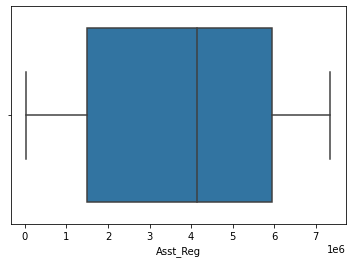

In [268]:
## Asst_Reg
sns.boxplot(df_train['Asst_Reg'])

In [269]:
df_test.quantile([0.99,0.999,0.9999])

Asst_Reg  Yearly Income  Unpaid 2 years  Already Defaulted  \
0.9900  7.275763e+06   4.400000e+05          4.0000                0.0   
0.9990  7.345995e+06   9.288893e+05          8.0000                1.0   
0.9999  7.351695e+06   1.890046e+06         14.2501                2.0   

        Debt to Income  Postal Code  Lend Amount  Deprecatory Records  \
0.9900       63.002016      98500.0      59850.0               2.0000   
0.9990       66.780202      99600.0      59850.0               5.0000   
0.9999       81.803971      99800.0      59850.0              10.2501   

        Interest Charged  Usage Rate  Inquiries  Present Balance  \
0.9900             24.82  169.592000      4.000     1.087882e+06   
0.9990             24.98  177.332344      5.501     1.912550e+06   
0.9999             25.00  206.830447      6.000     3.352281e+06   

        Gross Collection  Sub GGGrade  Account Open  Total Unpaid CL  \
0.9900       1568.219900         39.0          30.0     253531.80000   
0.9990       4973.206020         44.0          40.0     547677.16000   
0.9999       8952.473247         45.0          52.0     890938.96437   

        Unpaid Amount    Due Fee  
0.9900   155398.13100  15.000000  
0.9990   431306.06670  50.965950  
0.9999   758691.88344  91.043745

In [270]:
## Yearly income
df_test['Yearly Income'] = np.where(df_test['Yearly Income'] > 1773705, 1773705, df_test['Yearly Income'])

<AxesSubplot:xlabel='Yearly Income', ylabel='Density'>

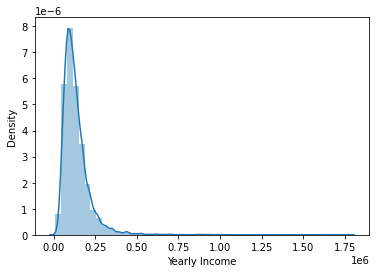

In [271]:
sns.distplot(df_test['Yearly Income'])

In [272]:
## Unpaid 2 years
df_test['Unpaid 2 years'] = np.where(df_test['Unpaid 2 years'] > 2, 2, df_test['Unpaid 2 years'])

In [273]:
## Already defaulted
df_test['Already Defaulted'] = np.where(df_test['Already Defaulted'] > 1, 1, df_test['Already Defaulted'])

<AxesSubplot:xlabel='Debt to Income'>

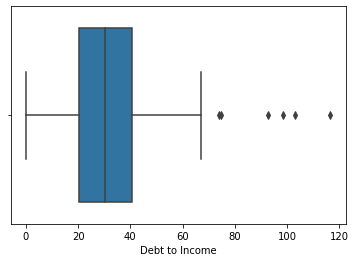

In [274]:
## Debt to Income 
sns.boxplot(df_test['Debt to Income'])

In [275]:
IQR = df_test['Debt to Income'].quantile(0.75) - df_test['Debt to Income'].quantile(0.25)
UL = df_test['Debt to Income'].quantile(0.75) + 1.5*(IQR)

In [276]:
df_test['Debt to Income'] = np.where(df_test['Debt to Income'] > UL, UL, df_test['Debt to Income'])

<AxesSubplot:xlabel='Lend Amount'>

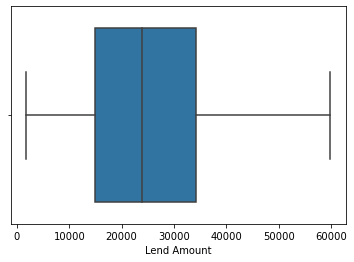

In [277]:
## Lend Amount
sns.boxplot(df_test['Lend Amount'])

In [278]:
## Deprecatory records
df_test['Deprecatory Records'] = np.where(df_test['Deprecatory Records'] > 2, 2, df_test['Deprecatory Records'])

<AxesSubplot:xlabel='Usage Rate'>

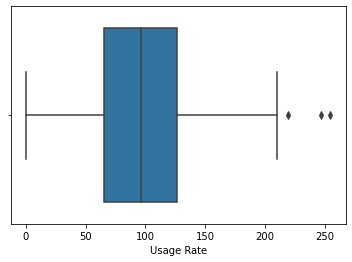

In [279]:
## Usage Rate
sns.boxplot(df_test['Usage Rate'])

In [280]:
IQR = df_test['Usage Rate'].quantile(0.75) - df_test['Usage Rate'].quantile(0.25)
UL = df_test['Usage Rate'].quantile(0.75) + 1.5*(IQR)

df_test['Usage Rate'] = np.where(df_test['Usage Rate'] > UL, UL, df_test['Usage Rate'])

In [281]:
## Inquiries
df_test['Inquiries'] = np.where(df_test['Inquiries'] > 3, 3, df_test['Inquiries'])

In [282]:
## Present Balance
df_test['Present Balance'] = np.where(df_test['Present Balance'] > 3028329, 3028329, df_test['Present Balance'])

In [283]:
df_test['Present Balance'].describe()

count    3.750000e+04
mean     2.352219e+05
std      2.525656e+05
min      0.000000e+00
25%      5.129572e+04
50%      1.383795e+05
75%      3.514983e+05
max      3.028329e+06
Name: Present Balance, dtype: float64

<AxesSubplot:xlabel='Gross Collection'>

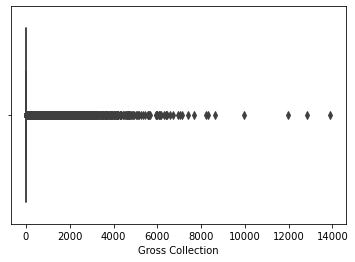

In [284]:
## Gross 
sns.boxplot(df_test['Gross Collection'])

In [285]:
df_test['Gross Collection'].describe()

count    37500.000000
mean        39.484071
std        364.114581
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      13900.000000
Name: Gross Collection, dtype: float64

In [287]:
df_test['Gross Collection'] = np.where(df_test['Gross Collection'] > 12549, 12549, df_test['Gross Collection'])

<AxesSubplot:xlabel='Due Fee'>

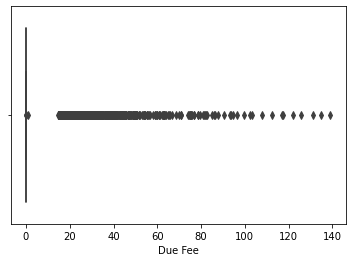

In [288]:
## Due Fee
sns.boxplot(df_train['Due Fee'])

In [289]:
df_test['Due Fee'].quantile([0.99,0.999,0.9999,0.99999])

0.99000     15.000000
0.99900     50.965950
0.99990     91.043745
0.99999    128.516329
Name: Due Fee, dtype: float64

In [290]:
df_test['Due Fee'] = np.where(df_test['Due Fee'] > 128, 128, df_test['Due Fee'])

<AxesSubplot:xlabel='Account Open'>

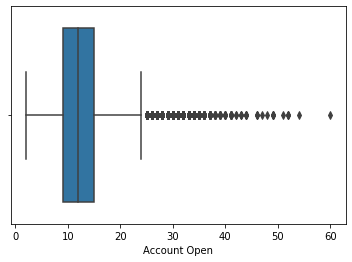

In [291]:
## Account open
sns.boxplot(df_test['Account Open'])

In [292]:
df_test['Account Open'] = np.where(df_test['Account Open'] > 52, 52, df_test['Account Open'])

In [293]:
## Total unpaid
df_test['Total Unpaid CL'] = np.where(df_test['Total Unpaid CL'] > 806194, 806194, df_test['Total Unpaid CL'])

<AxesSubplot:xlabel='Unpaid Amount'>

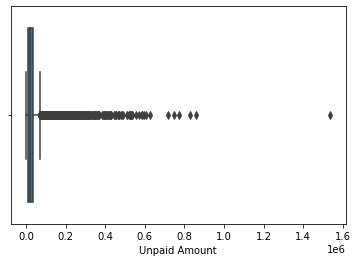

In [294]:
## Unpaid Amount
sns.boxplot(df_test['Unpaid Amount'])

In [295]:
df_test['Unpaid Amount'] = np.where(df_test['Unpaid Amount'] > 764845, 764845, df_test['Unpaid Amount'])

In [296]:
## Null Values Replacement
df_test['Yearly Income'] = df_test['Yearly Income'].fillna(df_test['Yearly Income'].median())
df_test['Debt to Income'] = df_test['Debt to Income'].fillna(df_test['Debt to Income'].median())
df_test['Total Unpaid CL'] = df_test['Total Unpaid CL'].fillna(df_test['Total Unpaid CL'].median())
df_test['Unpaid Amount'] = df_test['Unpaid Amount'].fillna(df_test['Unpaid Amount'].median())

In [297]:
## Dropping insignificant variable
df_test.drop(['Designation','Postal Code'],axis=1,inplace=True)

In [298]:
## Change DataTypes
df_test['Unpaid 2 years'] = df_test['Unpaid 2 years'].astype('object')
df_test['Already Defaulted'] = df_test['Already Defaulted'].astype('object')
df_test['Deprecatory Records'] = df_test['Deprecatory Records'].astype('object')
df_test['Inquiries'] = df_test['Inquiries'].astype('object')

In [299]:
## aranging numerical columns
dfts_num=df_test.select_dtypes('number')
dfts_num.columns

Index(['Asst_Reg', 'Yearly Income', 'Debt to Income', 'Lend Amount',
       'Interest Charged', 'Usage Rate', 'Present Balance', 'Gross Collection',
       'Sub GGGrade', 'Account Open', 'Total Unpaid CL', 'Unpaid Amount',
       'Due Fee'],
      dtype='object')

In [300]:
## Aranging categorical columns
dfts_cat=df_test.select_dtypes('object')
dfts_cat.columns

Index(['GGGrade', 'Experience', 'Validation', 'Home Status', 'Unpaid 2 years',
       'Already Defaulted', 'Deprecatory Records', 'Inquiries', 'File Status',
       'State', 'Duration', 'Reason', 'Claim Type'],
      dtype='object')

# Feature Engineering - Test Data

## Scaling the Data

In [301]:
y=StandardScaler()
df_nums1=y.fit_transform(dfts_num)
df_scaled1=pd.DataFrame(df_nums1,columns=dfts_num.columns)
df_scaled1.head(2)

Asst_Reg  Yearly Income  Debt to Income  Lend Amount  Interest Charged  \
0 -0.889448       0.098387       -1.028969    -0.546665         -1.553378   
1  0.653835       0.160994       -0.161449     2.362332         -1.305033   

   Usage Rate  Present Balance  Gross Collection  Sub GGGrade  Account Open  \
0   -0.415578        -0.694691         -0.108794    -0.776321      1.907772   
1   -0.466557         1.178879         -0.108794    -0.467734      0.788021   

   Total Unpaid CL  Unpaid Amount   Due Fee  
0        -0.381588      -0.384295 -0.091283  
1         1.916867       1.164120 -0.091283

## Encoding the Data

In [302]:
df_encode1=pd.get_dummies(dfts_cat,drop_first=True)
df_encode1.head(1)

GGGrade_II  GGGrade_III  GGGrade_IV  GGGrade_V  GGGrade_VI  GGGrade_VII  \
0           1            0           0          0           0            0   

   Experience_1yrs  Experience_2yrs  Experience_3yrs  Experience_4yrs  \
0                0                1                0                0   

   Experience_5yrs  Experience_6yrs  Experience_7yrs  Experience_8yrs  \
0                0                0                0                0   

   Experience_9yrs  Experience_=10yrs  Validation_Source Verified  \
0                0                  0                           1   

   Validation_Verified  Home Status_OTHER  Home Status_OWN  Home Status_RENT  \
0                    0                  0                1                 0   

   Unpaid 2 years_1  Unpaid 2 years_2  Already Defaulted_1  \
0                 0                 0                    0   

   Deprecatory Records_1  Deprecatory Records_2  Inquiries_1  Inquiries_2  \
0                      0                      0            1            0   

   Inquiries_3  File Status_whole  State_AL  State_AR  State_AZ  State_CA  \
0            0                  0         0         0         0         1   

   State_CO  State_CT  State_DC  State_DE  State_FL  State_GA  State_HI  \
0         0         0         0         0         0         0         0   

   State_IL  State_IN  State_KS  State_KY  State_LA  State_MA  State_MD  \
0         0         0         0         0         0         0         0   

   State_ME  State_MI  State_MN  State_MO  State_MS  State_MT  State_NC  \
0         0         0         0         0         0         0         0   

   State_ND  State_NE  State_NH  State_NJ  State_NM  State_NV  State_NY  \
0         0         0         0         0         0         0         0   

   State_OH  State_OK  State_OR  State_PA  State_RI  State_SC  State_SD  \
0         0         0         0         0         0         0         0   

   State_TN  State_TX  State_UT  State_VA  State_VT  State_WA  State_WI  \
0         0         0         0         0         0         0         0   

   State_WV  State_WY  Duration_5 years  Reason_credit card  \
0         0         0                 0                   0   

   Reason_debt consolidation  Reason_home improvement  Reason_house  \
0                          0                        0             0   

   Reason_major purchase  Reason_medical  Reason_moving  Reason_other  \
0                      1               0              0             0   

   Reason_renewable energy  Reason_small business  Reason_vacation  \
0                        0                      0                0   

   Reason_wedding  Claim Type_Joint  
0               0                 0

In [303]:
test_new=pd.concat([df_scaled1,df_encode1],axis=1)
test_new.head(1)

Asst_Reg  Yearly Income  Debt to Income  Lend Amount  Interest Charged  \
0 -0.889448       0.098387       -1.028969    -0.546665         -1.553378   

   Usage Rate  Present Balance  Gross Collection  Sub GGGrade  Account Open  \
0   -0.415578        -0.694691         -0.108794    -0.776321      1.907772   

   Total Unpaid CL  Unpaid Amount   Due Fee  GGGrade_II  GGGrade_III  \
0        -0.381588      -0.384295 -0.091283           1            0   

   GGGrade_IV  GGGrade_V  GGGrade_VI  GGGrade_VII  Experience_1yrs  \
0           0          0           0            0                0   

   Experience_2yrs  Experience_3yrs  Experience_4yrs  Experience_5yrs  \
0                1                0                0                0   

   Experience_6yrs  Experience_7yrs  Experience_8yrs  Experience_9yrs  \
0                0                0                0                0   

   Experience_=10yrs  Validation_Source Verified  Validation_Verified  \
0                  0                           1                    0   

   Home Status_OTHER  Home Status_OWN  Home Status_RENT  Unpaid 2 years_1  \
0                  0                1                 0                 0   

   Unpaid 2 years_2  Already Defaulted_1  Deprecatory Records_1  \
0                 0                    0                      0   

   Deprecatory Records_2  Inquiries_1  Inquiries_2  Inquiries_3  \
0                      0            1            0            0   

   File Status_whole  State_AL  State_AR  State_AZ  State_CA  State_CO  \
0                  0         0         0         0         1         0   

   State_CT  State_DC  State_DE  State_FL  State_GA  State_HI  State_IL  \
0         0         0         0         0         0         0         0   

   State_IN  State_KS  State_KY  State_LA  State_MA  State_MD  State_ME  \
0         0         0         0         0         0         0         0   

   State_MI  State_MN  State_MO  State_MS  State_MT  State_NC  State_ND  \
0         0         0         0         0         0         0         0   

   State_NE  State_NH  State_NJ  State_NM  State_NV  State_NY  State_OH  \
0         0         0         0         0         0         0         0   

   State_OK  State_OR  State_PA  State_RI  State_SC  State_SD  State_TN  \
0         0         0         0         0         0         0         0   

   State_TX  State_UT  State_VA  State_VT  State_WA  State_WI  State_WV  \
0         0         0         0         0         0         0         0   

   State_WY  Duration_5 years  Reason_credit card  Reason_debt consolidation  \
0         0                 0                   0                          0   

   Reason_home improvement  Reason_house  Reason_major purchase  \
0                        0             0                      1   

   Reason_medical  Reason_moving  Reason_other  Reason_renewable energy  \
0               0              0             0                        0   

   Reason_small business  Reason_vacation  Reason_wedding  Claim Type_Joint  
0                      0                0               0                 0

In [304]:
test_new.shape

(37500, 105)

# Model Building & HyperParameter Tuning

In [391]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

## Building a Base Model

In [306]:
## Logistic Regression
lr=LogisticRegression()
lr_model=lr.fit(xtrain,ytrain)

In [307]:
lr_pred=lr_model.predict(test_new)
lr_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [394]:
lr_cv=cross_val_score(lr,X=xtrain,y=ytrain,cv=5,scoring='f1_macro')

In [397]:
lr_cv

array([0.65636742, 0.66081472, 0.65852247, 0.65807852, 0.6632804 ])

In [308]:
lg_pred=pd.DataFrame(lr_pred)
sub=pd.read_csv('Sample_Submission.csv')
data=pd.concat([sub['ID'],lg_pred],axis=1)
data.columns=['ID','Loan/No Loan']
data.to_csv('Sample_Submission.csv',index=False)

In [309]:
## Using undersample
lru=LogisticRegression()
lru_model=lru.fit(xtrain1u,ytrain1u)

In [310]:
lru_pred=lru_model.predict(test_new)
lru_pred

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [311]:
lgu_pred=pd.DataFrame(lru_pred)
sub=pd.read_csv('Sample_Submission.csv')
data=pd.concat([sub['ID'],lgu_pred],axis=1)
data.columns=['ID','Loan/No Loan']
data.to_csv('Sample_Submission.csv',index=False)

In [125]:
## Using Smote 
lr1=LogisticRegression()
lr_model1=lr1.fit(xtrain1,ytrain1)

In [127]:
lr_pred1=lr_model1.predict(test_new)
lr_pred1

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [128]:
reg_pred=pd.DataFrame(lr_pred1)
sub=pd.read_csv('Sample_Submission.csv')
data=pd.concat([sub['ID'],reg_pred],axis=1)
data.columns=['ID','Loan/No Loan']
data.to_csv('Sample_Submission.csv',index=False)

In [312]:
## Descision Tree
dt=DecisionTreeClassifier(criterion='entropy',max_depth=5)
dt_model=dt.fit(xtrain,ytrain)

In [313]:
dt_pred=dt_model.predict(test_new)
dt_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [314]:
dtt_pred=pd.DataFrame(dt_pred)
sub=pd.read_csv('Sample_Submission.csv')
data=pd.concat([sub['ID'],dtt_pred],axis=1)
data.columns=['ID','Loan/No Loan']
data.to_csv('Sample_Submission.csv',index=False)

In [315]:
## Descision tree undersample
dtu=DecisionTreeClassifier(criterion='entropy',max_depth=5)
dtu_model=dt.fit(xtrain1u,ytrain1u)

In [316]:
dtu_pred=dtu_model.predict(test_new)
dtu_pred

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [317]:
dttu_pred=pd.DataFrame(dtu_pred)
sub=pd.read_csv('Sample_Submission.csv')
data=pd.concat([sub['ID'],dttu_pred],axis=1)
data.columns=['ID','Loan/No Loan']
data.to_csv('Sample_Submission.csv',index=False)

In [122]:
## Random forest 
rf=RandomForestClassifier()
rf_model=rf.fit(xtrain,ytrain)

In [123]:
rf_pred=rf_model.predict(test_new)
rf_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [124]:
rff_pred=pd.DataFrame(rf_pred)
sub=pd.read_csv('Sample_Submission.csv')
data=pd.concat([sub['ID'],rff_pred],axis=1)
data.columns=['ID','Loan/No Loan']
data.to_csv('Sample_Submission.csv',index=False)

In [333]:
## Random forest undersample
rfu1=RandomForestClassifier()
rfu_model1=rfu1.fit(xtrain1u,ytrain1u)

In [334]:
rfu_pred1=rfu_model1.predict(test_new)
rfu_pred1

array([1, 0, 1, ..., 1, 0, 1], dtype=int64)

In [129]:
## Random Forest Smote
rf1=RandomForestClassifier()
rf_model1=rf.fit(xtrain1,ytrain1)

In [130]:
rf_pred1=rf_model1.predict(test_new)
rf_pred1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [335]:
rffu_pred=pd.DataFrame(rfu_pred1)
sub=pd.read_csv('Sample_Submission.csv')
data=pd.concat([sub['ID'],rffu_pred],axis=1)
data.columns=['ID','Loan/No Loan']
data.to_csv('Sample_Submission.csv',index=False)

## Feature Importance

In [170]:
## Feature importance
## Randomforest feature importance
important_features = pd.DataFrame({'Features': xtrain.columns, 
                                   'Importance': rf_model.feature_importances_})
important_features = important_features.sort_values('Importance', ascending = False)

In [171]:
important_features.groupby('Features')['Importance'].agg('max').sort_values(ascending=False)

Features
Asst_Reg                      0.244911
Debt to Income                0.046608
Lend Amount                   0.043935
Sub GGGrade                   0.043914
Usage Rate                    0.042758
Yearly Income                 0.042315
Account Open                  0.041540
Interest Charged              0.040678
Present Balance               0.040424
Unpaid Amount                 0.039917
Total Unpaid CL               0.039423
File Status_whole             0.036862
Validation_Source Verified    0.019368
Duration_5 years              0.017982
Unpaid 2 years_1              0.011663
Unpaid 2 years_2              0.008994
Experience_=10yrs             0.008313
Home Status_RENT              0.008227
Validation_Verified           0.007979
Home Status_OWN               0.007882
Inquiries_1                   0.007639
Reason_credit card            0.007415
Reason_debt consolidation     0.007365
Deprecatory Records_1         0.006650
GGGrade_II                    0.006489
GGGrade_III     

## Train data using Feature impo

In [173]:
x_train=xtrain[['Asst_Reg','Debt to Income','Lend Amount','Sub GGGrade','Usage Rate','Yearly Income','Account Open',
                'Interest Charged','Present Balance','Unpaid Amount' ,'Total Unpaid CL','File Status_whole',
                'Validation_Source Verified','Duration_5 years','Unpaid 2 years_1','Unpaid 2 years_2',
                'Experience_=10yrs','Home Status_RENT' ,'Validation_Verified','Home Status_OWN']]
y_train=df_train['Loan/No Loan']

In [181]:
## Using smote
oversampleimpo=SMOTE()
x_train1,y_train1=oversampleimpo.fit_resample(x_train,y_train)

In [367]:
## Using undersample
undesampleimpo=RandomUnderSampler()
x_train1u,y_train1u=undesampleimpo.fit_resample(x_train,y_train)

## Testing Data Using Feature impo

In [176]:
test_new1=test_new[['Asst_Reg','Debt to Income','Lend Amount','Sub GGGrade','Usage Rate','Yearly Income','Account Open',
                'Interest Charged','Present Balance','Unpaid Amount' ,'Total Unpaid CL','File Status_whole',
                'Validation_Source Verified','Duration_5 years','Unpaid 2 years_1','Unpaid 2 years_2',
                'Experience_>=10yrs','Home Status_RENT' ,'Validation_Verified','Home Status_OWN']]

In [182]:
## Random forest 
rfimpo=RandomForestClassifier()
rfimpo_model=rfimpo.fit(x_train1,y_train1)

In [183]:
rfimpo_pred=rfimpo_model.predict(test_new1)
rfimpo_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [184]:
rffimpo_pred=pd.DataFrame(rfimpo_pred)
sub=pd.read_csv('Sample_Submission.csv')
data=pd.concat([sub['ID'],rffimpo_pred],axis=1)
data.columns=['ID','Loan/No Loan']
data.to_csv('Sample_Submission.csv',index=False)

## Tune hyperparameter for RandomSearchCV

In [339]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

In [341]:
grid = {'n_estimators': sp_randint(250, 400),
            'min_samples_leaf' : sp_randint(1, 12),
            'max_depth':sp_randint(1,12),
            'max_features' : sp_randint(5, 50)}
clf=RandomForestClassifier()
clf_rfc = RandomizedSearchCV(clf, n_jobs=-1, n_iter=10,
                                 param_distributions=grid,
                                 scoring='f1_macro')

In [342]:
rf_grid_model = clf_rfc.fit(xtrain, ytrain)

In [343]:
rf_grid_model.best_params_

{'max_depth': 11,
 'max_features': 46,
 'min_samples_leaf': 3,
 'n_estimators': 396}

In [344]:
# Randomforest using randcv
rf_gridr=RandomForestClassifier(n_estimators=396,max_depth=11,max_features=46,min_samples_leaf=3)
rfgridr_model=rf.fit(xtrain,ytrain)

In [346]:
rfgridr_pred=rfgridr_model.predict(test_new)
rfgridr_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [347]:
rffgridr_pred=pd.DataFrame(rfgridr_pred)
sub=pd.read_csv('Sample_Submission.csv')
data=pd.concat([sub['ID'],rffgridr_pred],axis=1)
data.columns=['ID','Loan/No Loan']
data.to_csv('Sample_Submission.csv',index=False)

In [348]:
# Randomforest using randcv
rf_gridru=RandomForestClassifier(n_estimators=396,max_depth=11,max_features=46,min_samples_leaf=3)
rfgridru_model=rf.fit(xtrain1u,ytrain1u)

In [349]:
rfgridru_pred=rfgridru_model.predict(test_new)
rfgridru_pred

array([1, 0, 1, ..., 1, 0, 0], dtype=int64)

In [350]:
rffgridru_pred=pd.DataFrame(rfgridru_pred)
sub=pd.read_csv('Sample_Submission.csv')
data=pd.concat([sub['ID'],rffgridru_pred],axis=1)
data.columns=['ID','Loan/No Loan']
data.to_csv('Sample_Submission.csv',index=False)

## AdaBoost 

In [132]:
## Ada Boost Smote
ada=AdaBoostClassifier()
ada_model1=ada.fit(xtrain1,ytrain1)

In [133]:
ada_pred1=ada_model1.predict(test_new)
ada_pred1

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

In [134]:
adab_pred=pd.DataFrame(ada_pred1)
sub=pd.read_csv('Sample_Submission.csv')
data=pd.concat([sub['ID'],adab_pred],axis=1)
data.columns=['ID','Loan/No Loan']
data.to_csv('Sample_Submission.csv',index=False)

## Gradient Boost 

In [138]:
gb=GradientBoostingClassifier()
gb_model=gb.fit(xtrain,ytrain)

In [139]:
gbb_pred=gb_model.predict(test_new)
gbb_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [140]:
gbbb_pred=pd.DataFrame(gbb_pred)
sub=pd.read_csv('Sample_Submission.csv')
data=pd.concat([sub['ID'],gbbb_pred],axis=1)
data.columns=['ID','Loan/No Loan']
data.to_csv('Sample_Submission.csv',index=False)

In [355]:
important_features1 = pd.DataFrame({'Features': xtrain.columns, 
                                   'Importance': gb_model.feature_importances_})
important_features1 = important_features.sort_values('Importance', ascending = False)

In [356]:
important_features1.groupby('Features')['Importance'].agg('max').sort_values(ascending=False)

Features
Asst_Reg                      0.244911
Debt to Income                0.046608
Lend Amount                   0.043935
Sub GGGrade                   0.043914
Usage Rate                    0.042758
Yearly Income                 0.042315
Account Open                  0.041540
Interest Charged              0.040678
Present Balance               0.040424
Unpaid Amount                 0.039917
Total Unpaid CL               0.039423
File Status_whole             0.036862
Validation_Source Verified    0.019368
Duration_5 years              0.017982
Unpaid 2 years_1              0.011663
Unpaid 2 years_2              0.008994
Experience_=10yrs             0.008313
Home Status_RENT              0.008227
Validation_Verified           0.007979
Home Status_OWN               0.007882
Inquiries_1                   0.007639
Reason_credit card            0.007415
Reason_debt consolidation     0.007365
Deprecatory Records_1         0.006650
GGGrade_II                    0.006489
GGGrade_III     

## Gradient Boost Smote

In [357]:
# using smote
gb=GradientBoostingClassifier()
gb_model=gb.fit(xtrain1,ytrain1)

In [358]:
gbb_pred1=gb_model.predict(test_new)
gbb_pred1

array([1, 0, 1, ..., 1, 0, 0], dtype=int64)

In [359]:
gbba_pred=pd.DataFrame(gbb_pred1)
sub=pd.read_csv('Sample_Submission.csv')
data=pd.concat([sub['ID'],gbba_pred],axis=1)
data.columns=['ID','Loan/No Loan']
data.to_csv('Sample_Submission.csv',index=False)

## Final Model Best F1 Score

In [414]:
## Gradient Boost using undersample
gbu=GradientBoostingClassifier(learning_rate=0.1,max_depth=4)
gbu_model=gbu.fit(xtrain1u,ytrain1u)

In [415]:
gbbu_pred1=gbu_model.predict(test_new)
gbbu_pred1

array([1, 0, 1, ..., 1, 0, 0], dtype=int64)

In [390]:
gbu_model.score(xtrain1u,ytrain1u)

0.7701065891472868

In [416]:
gbbau_pred=pd.DataFrame(gbbu_pred1)
sub=pd.read_csv('Sample_Submission.csv')
data=pd.concat([sub['ID'],gbbau_pred],axis=1)
data.columns=['ID','Loan/No Loan']
data.to_csv('Sample_Submission.csv',index=False)

## Tune the hyperparameter GridsearchCV

In [143]:
tuning_parameters = {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
                     'max_depth': range(3,7)}
gb_model1=GradientBoostingClassifier()
gb_grid = GridSearchCV(estimator = gb_model1, param_grid = tuning_parameters, cv = 5)

In [158]:
gb_grid.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
                         'max_depth': range(3, 7)})

In [159]:
gb_grid.best_params_

{'learning_rate': 0.1, 'max_depth': 4}

In [163]:
# using best param
gbxb=GradientBoostingClassifier(learning_rate=0.1,max_depth=4)
gbxb_model=gbxb.fit(xtrain1,ytrain1)

In [164]:
gbxb_pred=gbxb_model.predict(test_new)
gbxb_pred

array([1, 0, 1, ..., 1, 0, 0], dtype=int64)

In [165]:
gbbxb_pred=pd.DataFrame(gbxb_pred)
sub=pd.read_csv('Sample_Submission.csv')
data=pd.concat([sub['ID'],gbbxb_pred],axis=1)
data.columns=['ID','Loan/No Loan']
data.to_csv('Sample_Submission.csv',index=False)

In [185]:
# using best param and smote and feature impo
gbxbim=GradientBoostingClassifier(learning_rate=0.1,max_depth=4)
gbxbim_model=gbxb.fit(x_train1,y_train1)

In [187]:
gbxbim_pred=gbxbim_model.predict(test_new1)
gbxbim_pred

array([1, 1, 0, ..., 0, 0, 1], dtype=int64)

In [188]:
gbbxbim_pred=pd.DataFrame(gbxb_pred)
sub=pd.read_csv('Sample_Submission.csv')
data=pd.concat([sub['ID'],gbbxbim_pred],axis=1)
data.columns=['ID','Loan/No Loan']
data.to_csv('Sample_Submission.csv',index=False)

In [411]:
## using best param and undersample technique ,feature impo
gbxbimu=GradientBoostingClassifier(learning_rate=0.1,max_depth=4)
gbxbim_model=gbxbimu.fit(x_train1u,y_train1u)

In [412]:
gbxbimu_pred=gbxbim_model.predict(test_new1)
gbxbimu_pred

array([1, 0, 1, ..., 1, 0, 0], dtype=int64)

In [413]:
gbbxbimu_pred=pd.DataFrame(gbxbimu_pred)
sub=pd.read_csv('Sample_Submission.csv')
data=pd.concat([sub['ID'],gbbxbimu_pred],axis=1)
data.columns=['ID','Loan/No Loan']
data.to_csv('Sample_Submission.csv',index=False)

## Tune hyperparameter for RandomSearchCV

## XgBoost Smote

In [166]:
# using smote
xg=XGBClassifier(gamma=1,max_depth=5)
xg_model=xg.fit(xtrain1,ytrain1)

[11:15:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [167]:
xgbb_pred1=xg_model.predict(test_new)
xgbb_pred1

array([1, 0, 0, ..., 1, 0, 1], dtype=int64)

In [168]:
xgbba_pred=pd.DataFrame(xgbb_pred1)
sub=pd.read_csv('Sample_Submission.csv')
data=pd.concat([sub['ID'],xgbba_pred],axis=1)
data.columns=['ID','Loan/No Loan']
data.to_csv('Sample_Submission.csv',index=False)

In [363]:
# using undersample
xgu=XGBClassifier()
xgu_model=xg.fit(xtrain1u,ytrain1u)

[18:07:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [364]:
xgbbu_pred1=xgu_model.predict(test_new)
xgbbu_pred1

array([1, 0, 1, ..., 1, 0, 1], dtype=int64)

In [365]:
xgbbau_pred=pd.DataFrame(xgbbu_pred1)
sub=pd.read_csv('Sample_Submission.csv')
data=pd.concat([sub['ID'],xgbbau_pred],axis=1)
data.columns=['ID','Loan/No Loan']
data.to_csv('Sample_Submission.csv',index=False)

In [ ]:
Business Interpretation
Customers who have less asset value are more likely to default.
Customers who live in states such as California,New York,Florida and Texas are more likely to default.
Customers who live in mortgage houses are more likely to default.
Customers who have defaulted loan once in past two years are more likely to default.